In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('C:/Users/A30010587/Downloads/cwp_interview/cwp_interview/'))
if module_path not in sys.path:
    sys.path.append(module_path)


import torch
import numpy as np
from typing import Optional, Dict, Any
import torch
import torch.nn as nn
from utils import NormalizationIdentity, NormalizationStandardization, _split_series_time_dims, _merge_series_time_dims, _easy_mlp, device
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cvxpy as cp
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("Question2.csv", index_col=0, header=[0,1], parse_dates=True)

Data Import

In [2]:
da = data["da"]
rt = data["rt"]
X = data["X"]

# example of prices with a two day lag if you wish to use timeseries as features (ie RNN, CNN, ARIMA, etc...)
shifted_da = da.shift(freq="48H")
shifted_rt = rt.shift(freq="48H")

split = datetime(2020,8,1)

X_train = X.loc[:split]
X_validate = X.loc[split:]

da_train = da.loc[:split]
da_validate = da.loc[split:]

rt_train = rt.loc[:split]
rt_validate = rt.loc[split:]

print('\nVerify NaN values')
print('X_train',X_train.isnull().values.any())
print('Nan index in X_train',X_train.isnull().values.any(1).nonzero()[0])
X_train.fillna(X_train.median(), inplace = True)
print('X_train',X_train.isnull().values.any())
print('X_validate',X_validate.isnull().values.any())
print('da_train',da_train.isnull().values.any())
print('da_validate',da_validate.isnull().values.any())
print('rt_train',rt_train.isnull().values.any())
print('rt_validate',rt_validate.isnull().values.any())



Verify NaN values
X_train True
Nan index in X_train [10468]
X_train False
X_validate False
da_train False
da_validate False
rt_train False
rt_validate False


RNN decoder

In [3]:
from Model import TradingBot
from QuantileDecoder import QuantileDecoder, AttentionalQuantile
from utils import hourly_results, worst_loss, best_loss
def RNN_model(gamma:float, l_norm:int):
    model_name = 'RNN_model'
    net = TradingBot(
        num_series=100,
        input_dim = 4,
        gamma = gamma,
        l_norm = l_norm,
        data_normalization="standardization",
        loss_normalization="series",
        rnn_decoder={
            "dim_hidden_features":2,
            "num_layers":2,#32,
            "dim_output":168 #predict one day ahead for the next week 24*7
        },
        
    )
    return net.to(device), model_name

TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 50/50 [01:22<00:00,  1.66s/it]


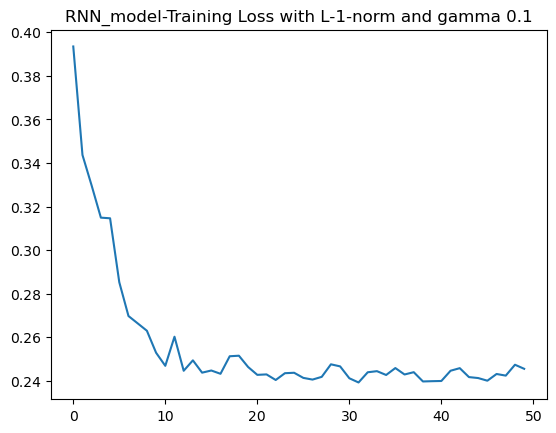

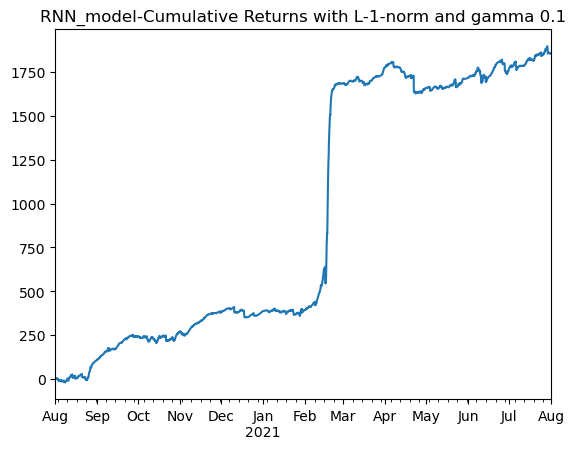

Portfolio returns 1477.779
constraint -60.414
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 50/50 [01:23<00:00,  1.66s/it]


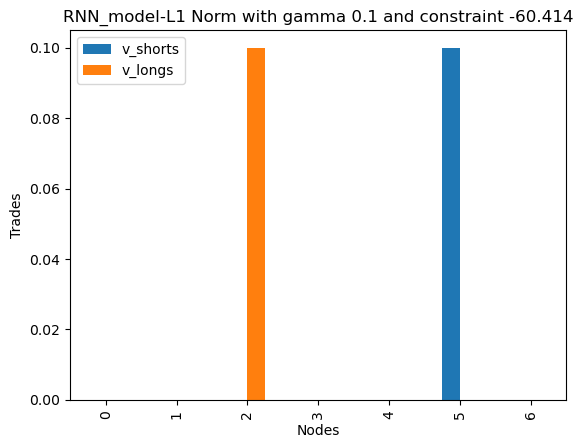

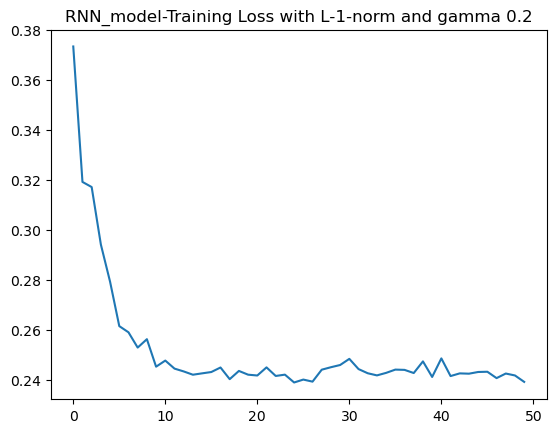

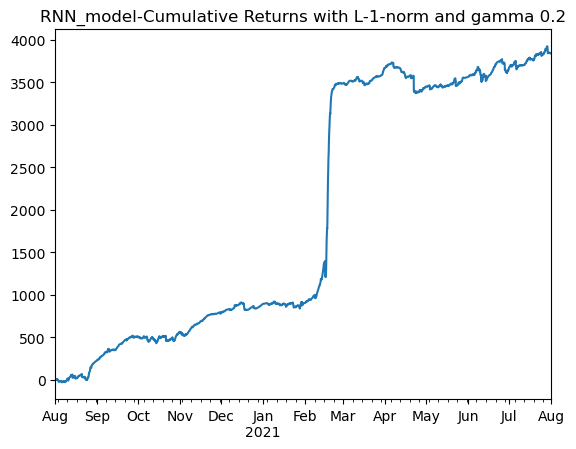

Portfolio returns 3046.8340000000003
constraint -120.828
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 50/50 [01:23<00:00,  1.67s/it]


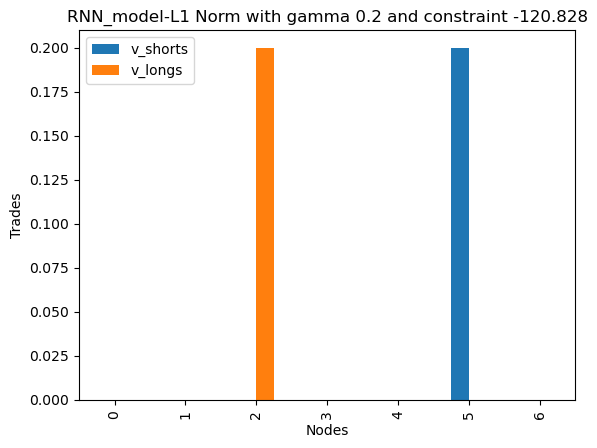

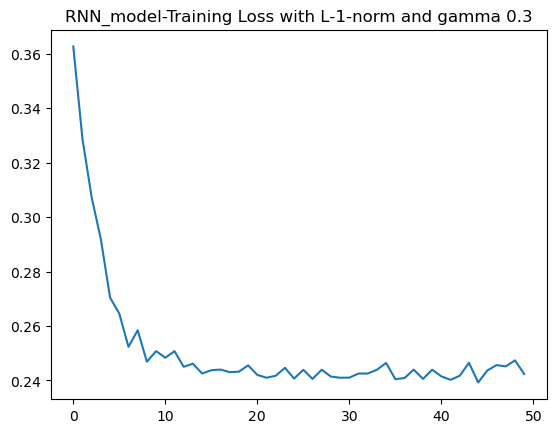

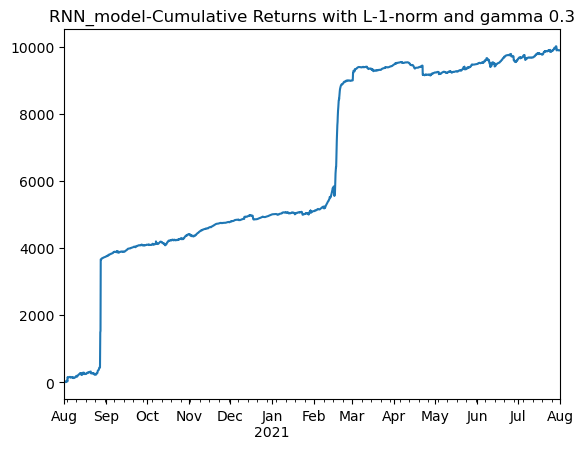

Portfolio returns 7133.3369999999995
constraint -181.242
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 50/50 [01:22<00:00,  1.66s/it]


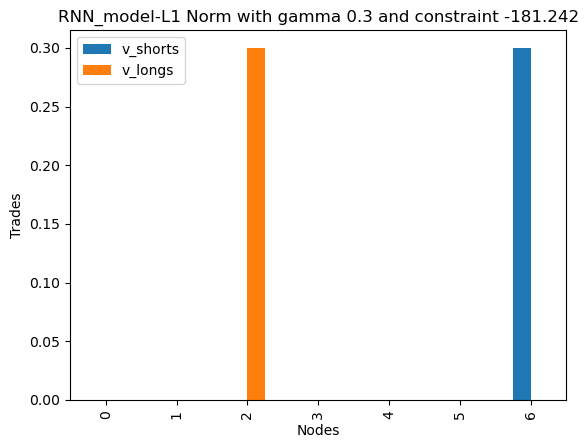

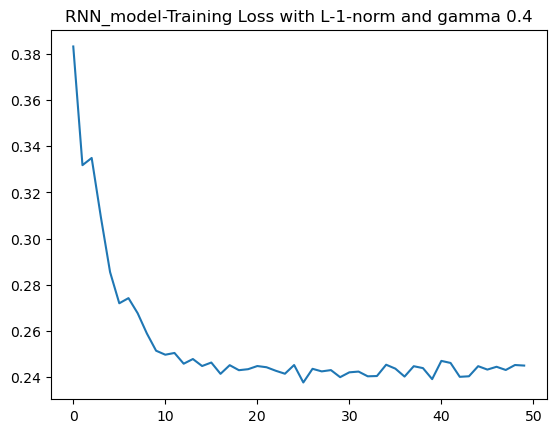

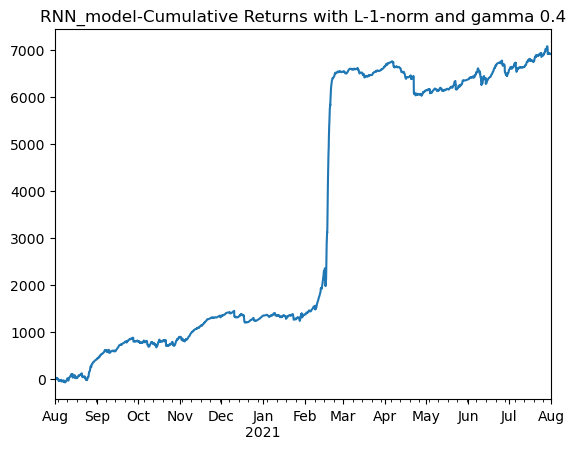

Portfolio returns 5776.484000000001
constraint -241.656
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 50/50 [01:22<00:00,  1.64s/it]


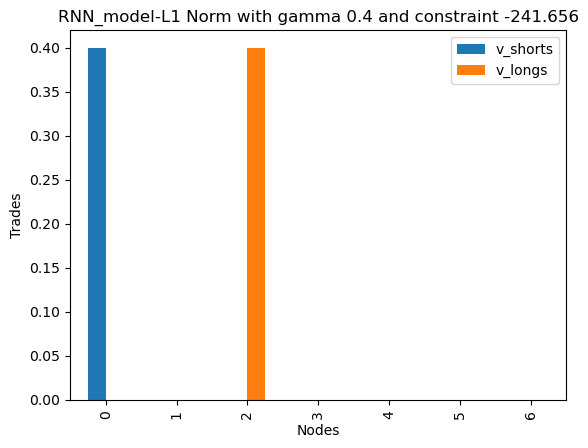

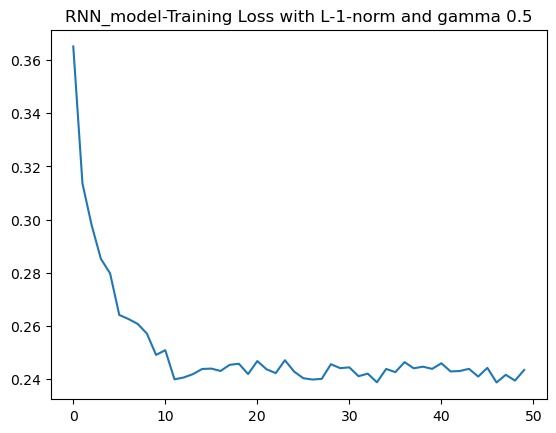

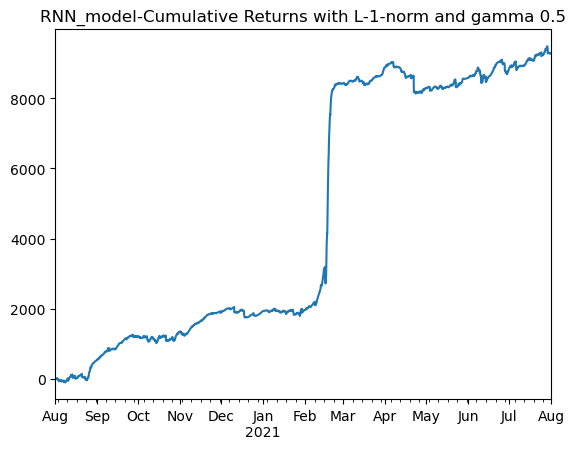

Portfolio returns 7326.675000000001
constraint -302.07
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 50/50 [01:20<00:00,  1.62s/it]


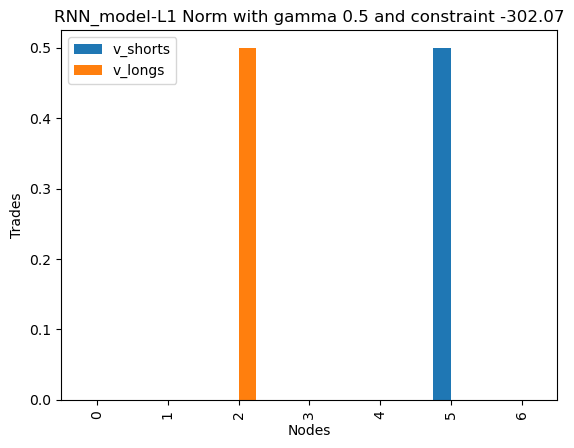

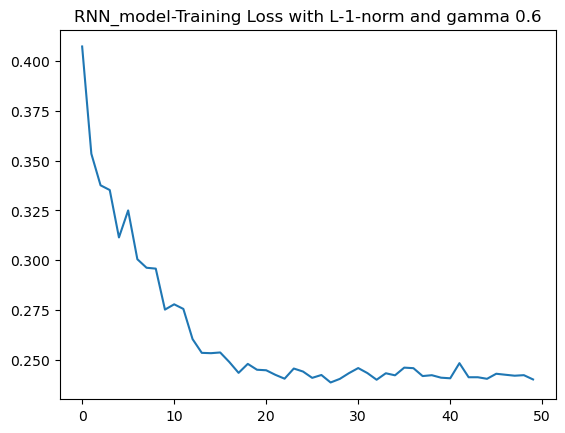

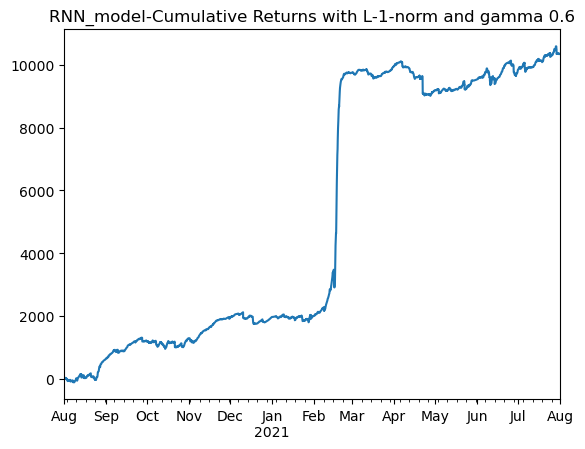

Portfolio returns 7465.157999999999
constraint -362.484
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 50/50 [01:20<00:00,  1.61s/it]


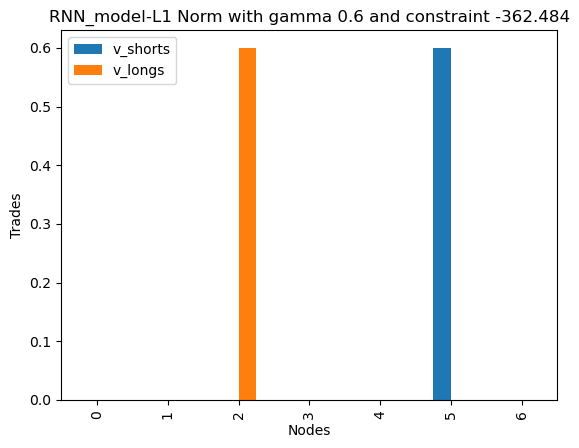

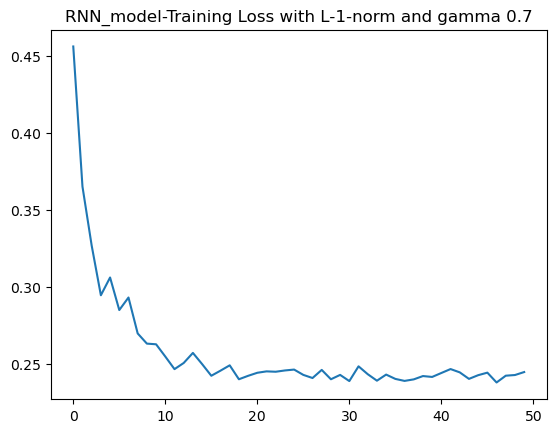

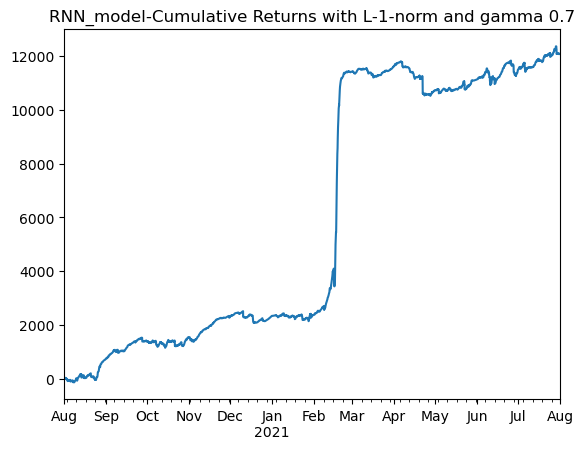

Portfolio returns 9982.580999999998
constraint -422.89799999999997
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 50/50 [01:20<00:00,  1.61s/it]


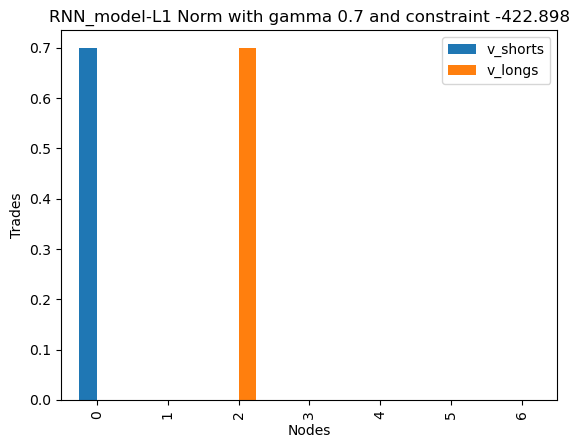

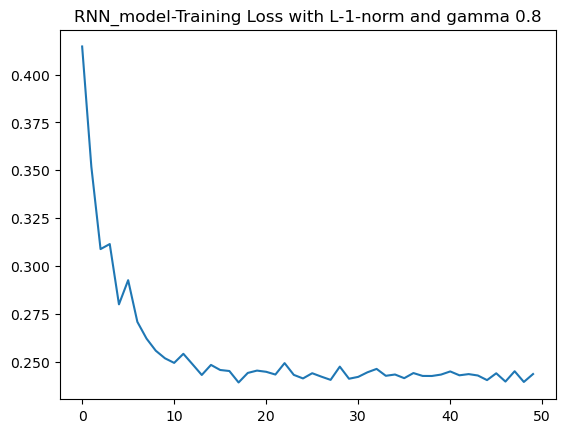

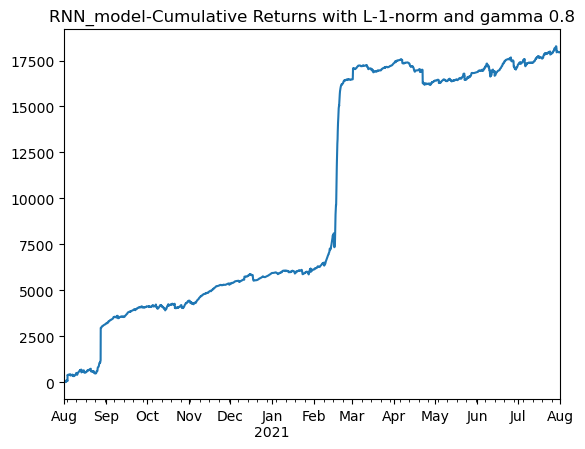

Portfolio returns 12351.432000000004
constraint -483.312
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 50/50 [01:20<00:00,  1.62s/it]


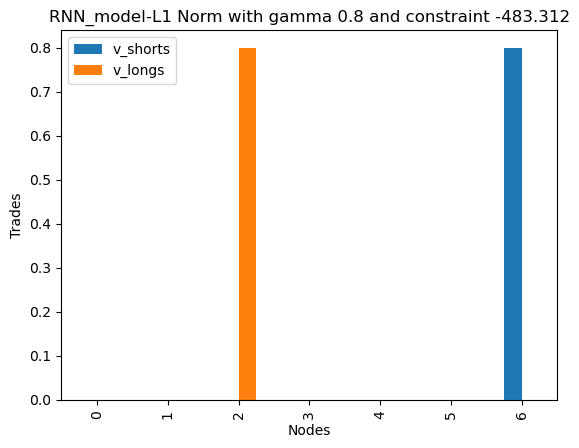

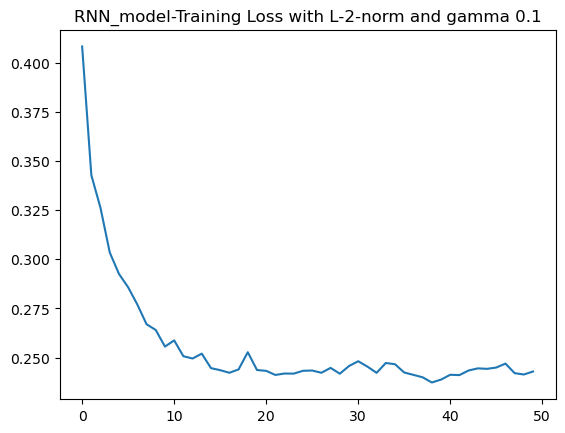

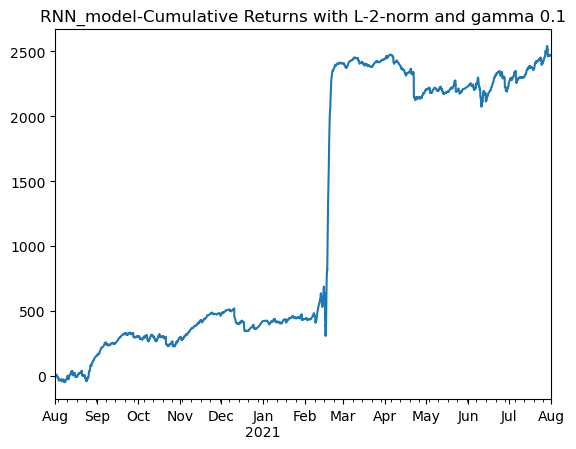

Portfolio returns 2278.937414
constraint -121.416676
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 50/50 [01:21<00:00,  1.62s/it]


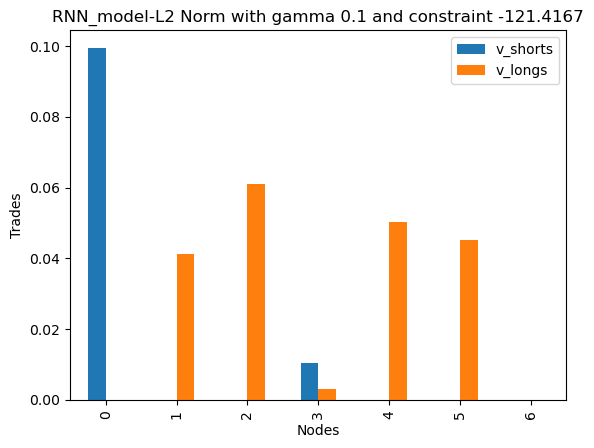

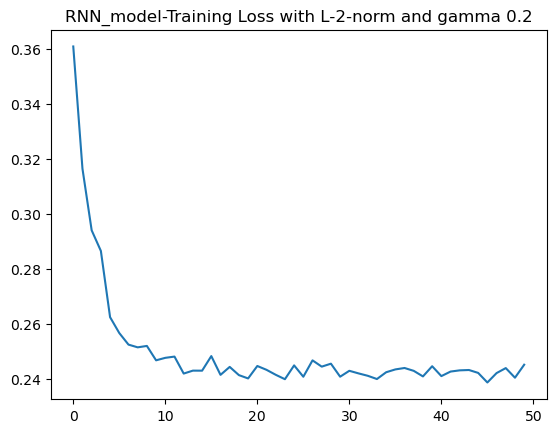

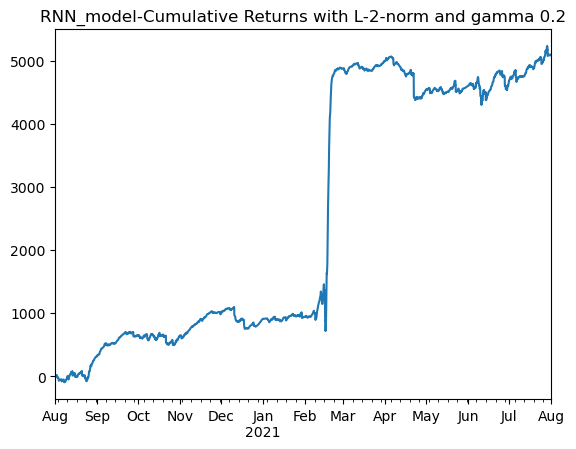

Portfolio returns 4560.905873
constraint -243.394925
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 50/50 [01:21<00:00,  1.63s/it]


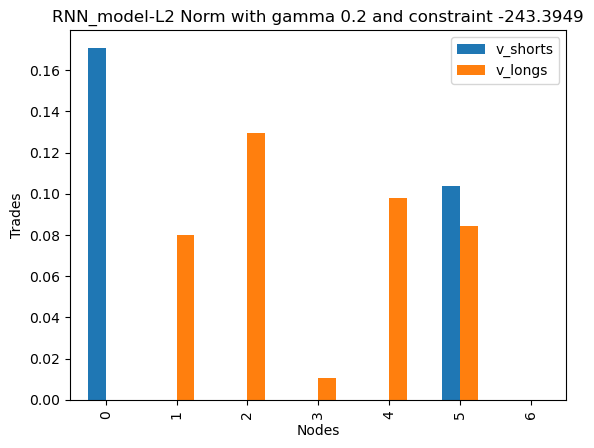

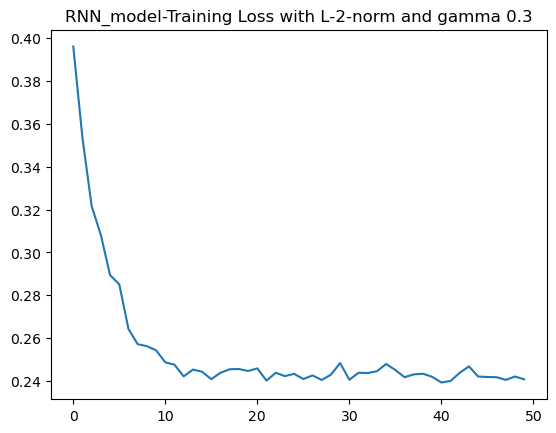

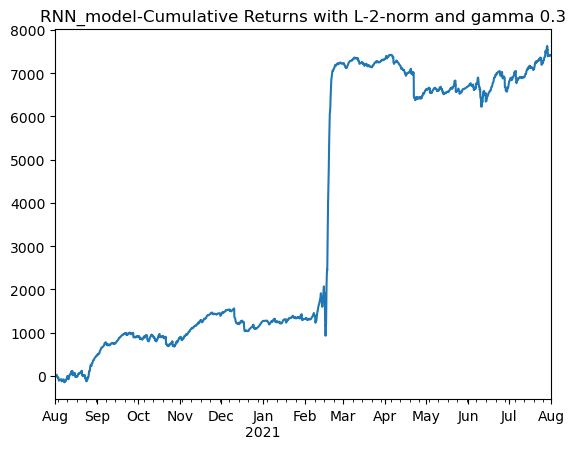

Portfolio returns 6865.458729000002
constraint -364.740337
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 50/50 [01:20<00:00,  1.62s/it]


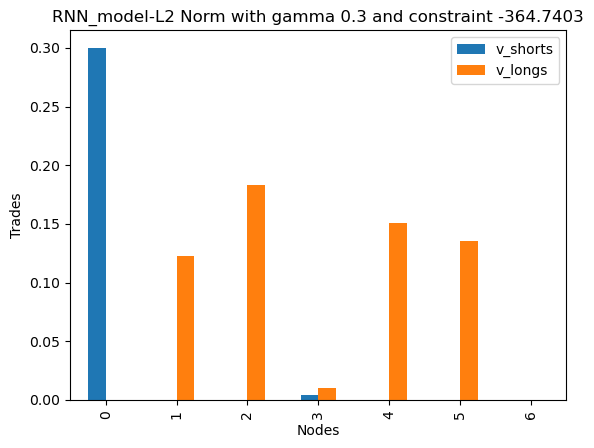

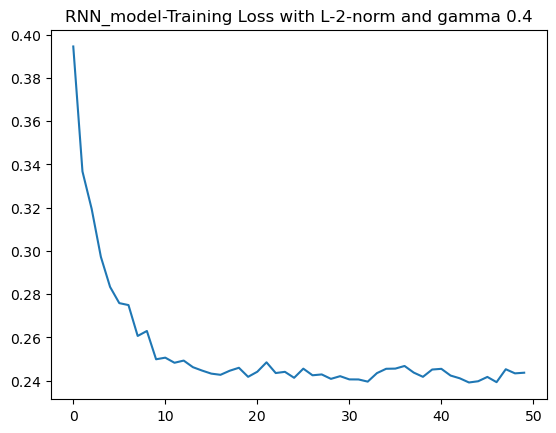

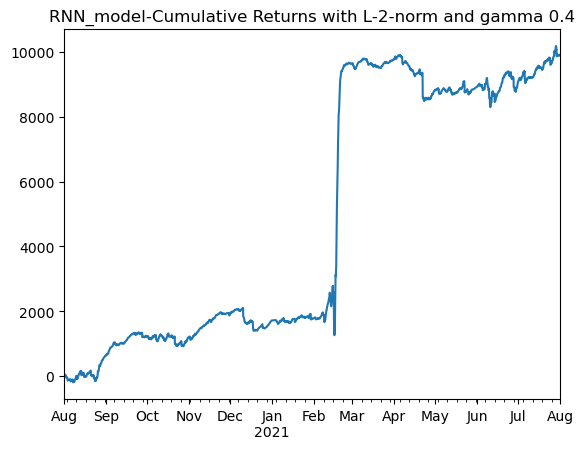

Portfolio returns 9186.067414
constraint -489.72480200000007
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 50/50 [01:20<00:00,  1.62s/it]


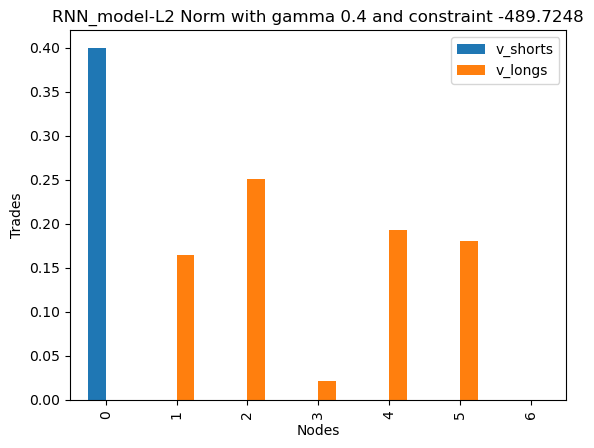

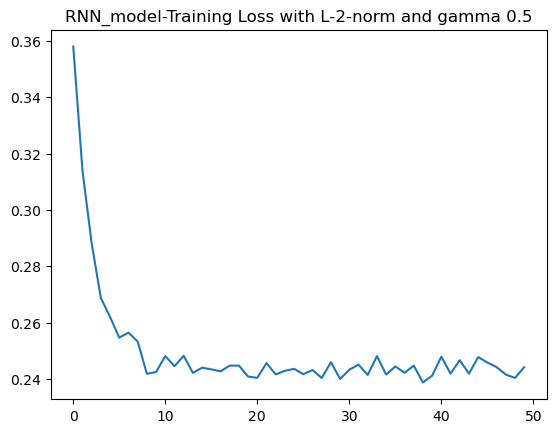

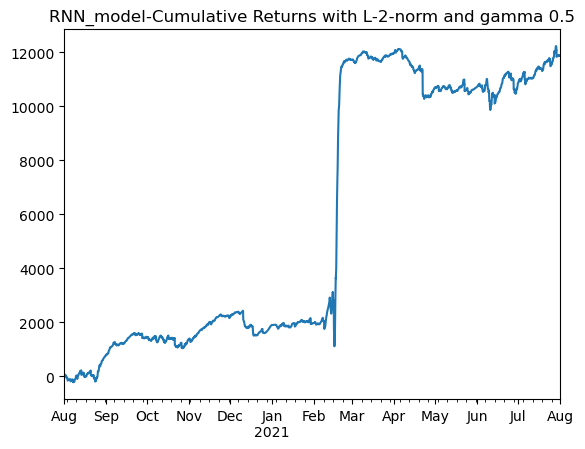

Portfolio returns 9964.800152
constraint -600.1415079999999
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 50/50 [01:20<00:00,  1.62s/it]


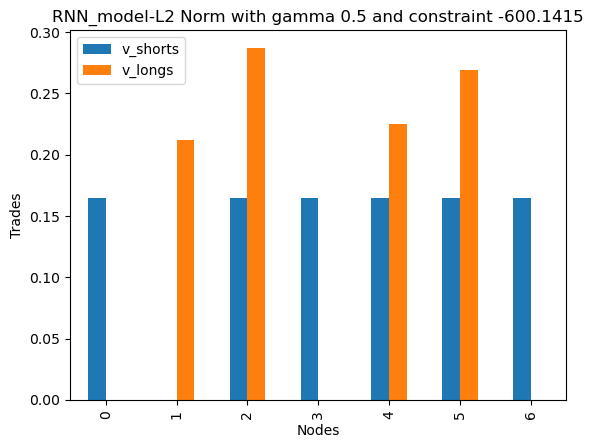

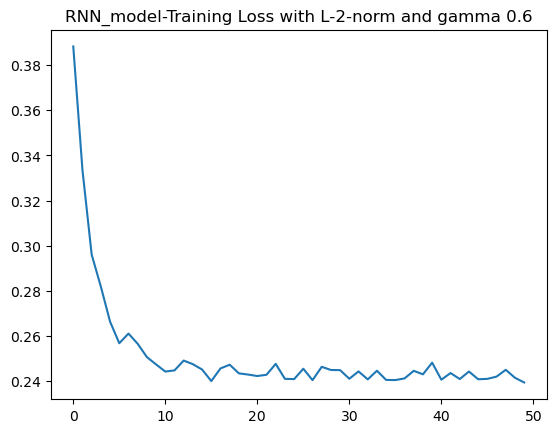

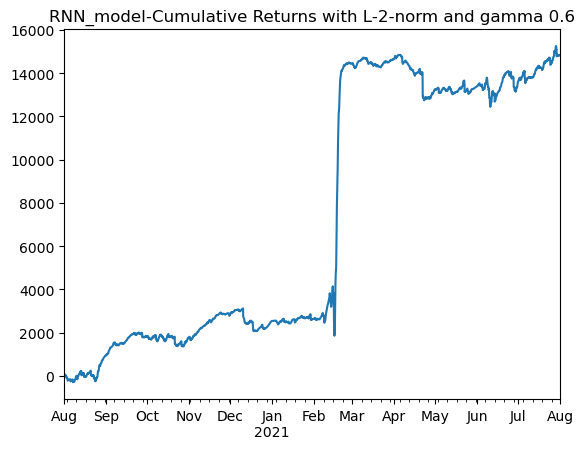

Portfolio returns 13720.362921999998
constraint -729.8481820000001
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 50/50 [01:22<00:00,  1.64s/it]


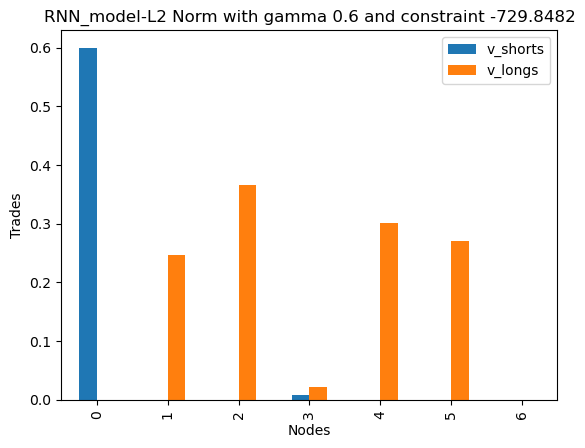

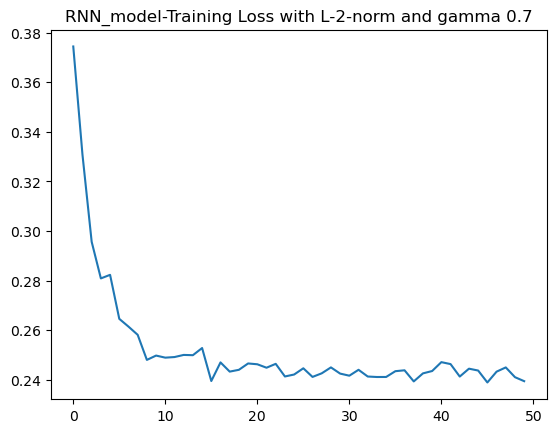

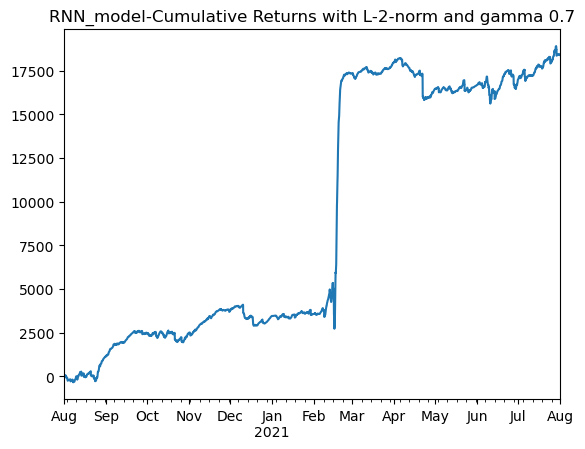

Portfolio returns 15731.013574
constraint -856.3245119999999
TradingBot(
  (series_encoder): Embedding(100, 2)
  (decoder): RNNDecoder(
    (rnn): RNN(4, 2, num_layers=2, batch_first=True)
    (readout): Linear(in_features=2, out_features=168, bias=True)
    (relu): ReLU()
    (distribution_mu): Linear(in_features=4, out_features=168, bias=True)
    (distribution_presigma): Linear(in_features=4, out_features=168, bias=True)
    (distribution_sigma): Softplus(beta=1, threshold=20)
  )
)


100%|██████████| 50/50 [01:21<00:00,  1.64s/it]


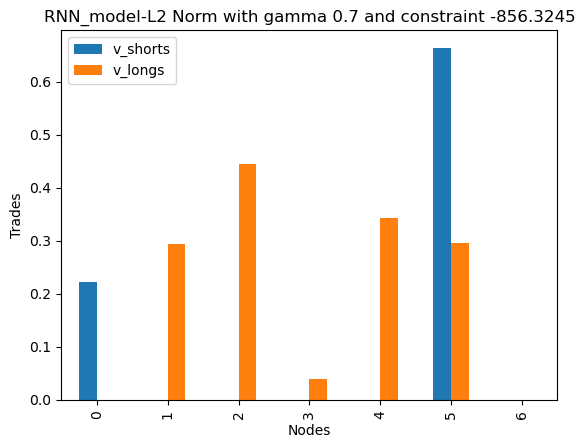

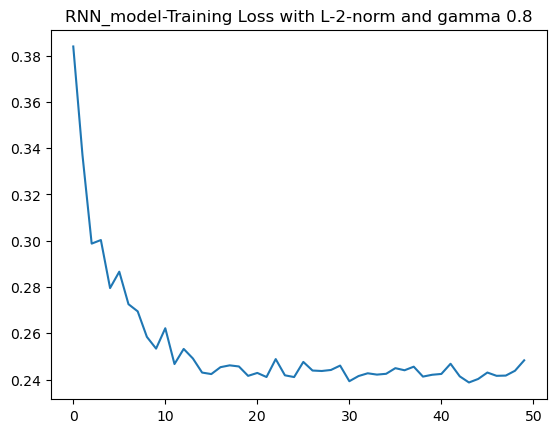

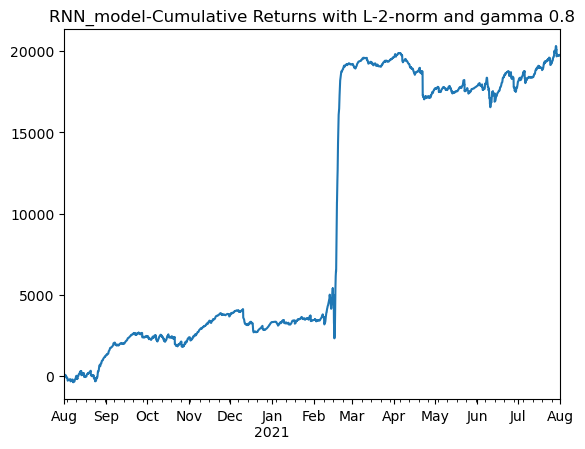

Portfolio returns 18350.034416000002
constraint -969.114858


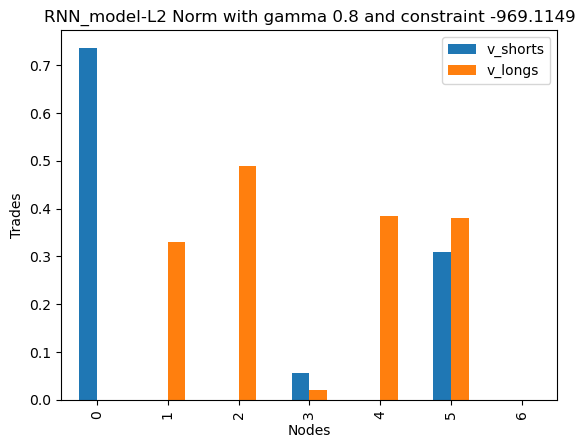

In [4]:

L_vals = np.arange(0.1,0.9,0.1)
L_norms = [1,2]
pd_dict={}
worst_loss_list = np.empty((len(L_norms), len(L_vals)))
worst_return_list = []
best_return_list = []
for l_norm in L_norms:
    for k, L_val in enumerate(L_vals):
        nodes = 7
        volume_short = np.zeros((len(L_vals), nodes))
        volume_long = np.zeros((len(L_vals), nodes))
        net, model_name = RNN_model(gamma= L_val, l_norm=l_norm)
        optimizer = torch.optim.RMSprop(net.parameters(), lr=1e-3, weight_decay=0)

        print(net)

        avg_loss = []

        NUM_EPOCHS = 50  # The model is very slow to train
        NUM_BATCHES = 35

        for epoch in tqdm(range(NUM_EPOCHS)):
            running_sum = 0
            for batch in range(NUM_BATCHES):
                running_sum += net.train_step(optimizer, 32, da_train.values.T, 24, 24)
            avg_loss.append(running_sum / NUM_BATCHES)

        plt.figure()
        plt.plot(avg_loss)
        plt.title('{}-Training Loss with L-{}-norm and gamma {}'.format(model_name,l_norm, round(L_val,4)))
        plt.show()

        v_long, bid, v_short, offer = net.predict(X_validate, da, da_validate, rt_validate)
        results = hourly_results(v_long, bid.values, v_short, offer.values, da_validate, rt_validate)
        pnl = results.sum(axis=1).cumsum()
        pnl.plot()
        plt.title('{}-Cumulative Returns with L-{}-norm and gamma {}'.format(model_name,l_norm, round(L_val,4)))
        plt.show()
        portfolio_rets = bid.dot(v_long)+ offer.dot(v_short)
        constraint = worst_loss(results)
        best_hour = best_loss(results)
        print('Portfolio returns',np.sum(portfolio_rets))
        print('constraint',constraint)
        worst_return_list.append(constraint)
        best_return_list.append(best_hour)
        for i in range(nodes):
            volume_long[k, :] = v_long
            volume_short[k, :] = v_short
            pd_dict[l_norm, k] = pd.DataFrame({"gamma": f"{round(L_vals[k],4)}",
                            "v_shorts":v_long,
                            "v_longs":v_short})
            pd_dict[l_norm,k]['L_norm'] = f"L{l_norm}"
            
        pd_dict[l_norm,k]['model'] = model_name
        pd_dict[l_norm,k]['PTF_Return'] = np.sum(portfolio_rets)
        pd_dict[l_norm,k]['Worst_Return'] = constraint
        pd_dict[l_norm,k].loc[:, :'L_norm'].plot(kind="bar")
        plt.title("{}-L{} Norm with gamma {} and constraint {}".format(model_name,l_norm,pd_dict[l_norm,k]['gamma'][0], round(pd_dict[l_norm,k]['Worst_Return'][0],4)) )
        plt.xlabel("Nodes")
        plt.ylabel("Trades")


In [5]:
pd_dict

{(1,
  0):   gamma  v_shorts  v_longs L_norm      model  PTF_Return  Worst_Return
 0   0.1       0.0      0.0     L1  RNN_model    1477.779       -60.414
 1   0.1       0.0      0.0     L1  RNN_model    1477.779       -60.414
 2   0.1       0.0      0.1     L1  RNN_model    1477.779       -60.414
 3   0.1       0.0      0.0     L1  RNN_model    1477.779       -60.414
 4   0.1       0.0      0.0     L1  RNN_model    1477.779       -60.414
 5   0.1       0.1      0.0     L1  RNN_model    1477.779       -60.414
 6   0.1       0.0      0.0     L1  RNN_model    1477.779       -60.414,
 (1,
  1):   gamma  v_shorts  v_longs L_norm      model  PTF_Return  Worst_Return
 0   0.2       0.0      0.0     L1  RNN_model    3046.834      -120.828
 1   0.2       0.0      0.0     L1  RNN_model    3046.834      -120.828
 2   0.2       0.0      0.2     L1  RNN_model    3046.834      -120.828
 3   0.2       0.0      0.0     L1  RNN_model    3046.834      -120.828
 4   0.2       0.0      0.0     L1  RNN_mod

We pick the best startegy that satisfies our constraint and maximizes the returns

The Model to consider is : RNN moel with gamma = 0.8 with L2-norm

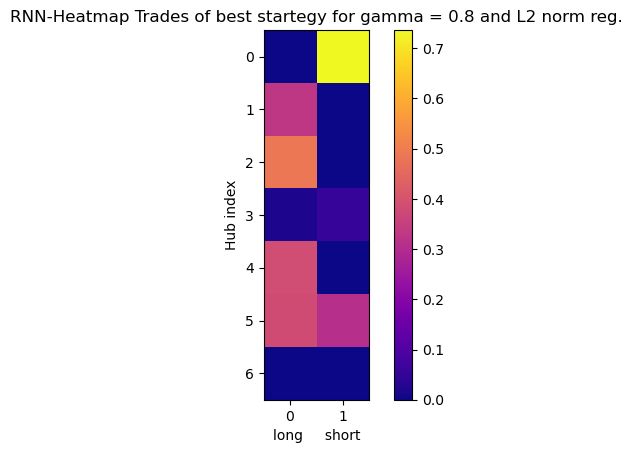

In [6]:

df_trades = pd_dict[(2,7)][['v_longs', 'v_shorts']]
df_trades
heatmap, ax = plt.subplots()
plt.imshow(df_trades, cmap='plasma', interpolation='nearest')
plt.colorbar()
plt.title('RNN-Heatmap Trades of best startegy for gamma = 0.8 and L2 norm reg.')
ax.set(xlabel='long     short', ylabel='Hub index')
plt.show()


We can visulaize the result of our startegy

Text(0, 0.5, 'Observation Frequency')

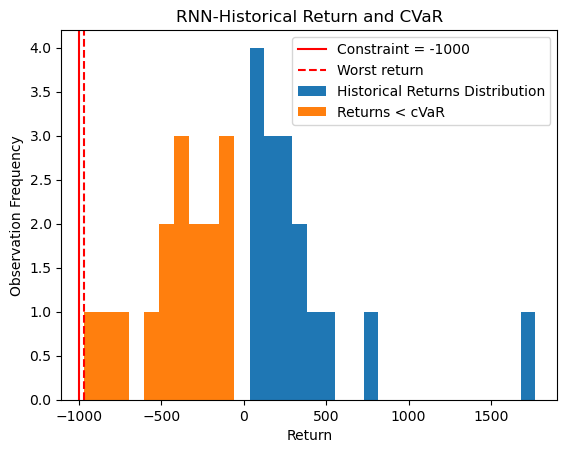

In [7]:
plt.hist(best_return_list, bins=20)
plt.hist(worst_return_list, bins=10)
plt.axvline(-1000, color='red', linestyle='solid')
plt.axvline(constraint, color='red', linestyle='dashed')
plt.legend(['Constraint = -1000',
            'Worst return',
            'Historical Returns Distribution', 
            'Returns < cVaR'])
plt.title('RNN-Historical Return and CVaR')
plt.xlabel('Return')
plt.ylabel('Observation Frequency')

Transformer Model

In [8]:
from Model import TradingBot
from utils import hourly_results, worst_loss
def Transformers_model(gamma:float, l_norm:int):
    model_name = 'Transformers'
    net = TradingBot(
        num_series=100,
        input_dim = 12,
        gamma = gamma,
        l_norm = l_norm,
        data_normalization="standardization",
        loss_normalization="series",
        series_embedding_dim=13,
        input_encoder_layers=3,
        input_encoding_normalization=True,
        encoder= {
            "attention_layers":3,
            "attention_heads": 3,
            "attention_dim": 4,
            "attention_feedforward_dim": 12,
        },
        quantile_decoder={
             "min_u": 0.01,
             "max_u": 0.99,
            "attentional_quantile": {
                "attention_heads": 3,
                "attention_layers": 3,
                "attention_dim": 12,
                "mlp_layers": 3,
                "mlp_dim": 16,
                "resolution": 50,
            },
        }
    )
    return net.to(device), model_name

TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, out_features=36, bias=True)
      (key_creators): ModuleLi

100%|██████████| 50/50 [09:02<00:00, 10.85s/it]


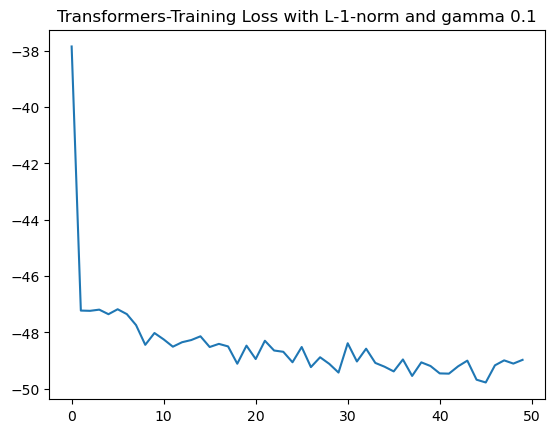

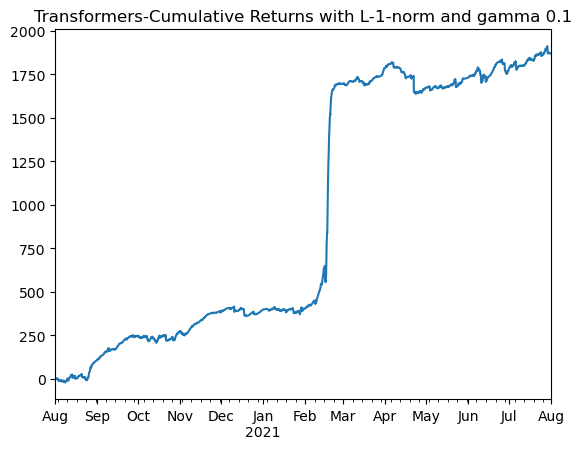

Portfolio returns 1502.101
constraint -60.414
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, out_features

100%|██████████| 50/50 [09:40<00:00, 11.61s/it]


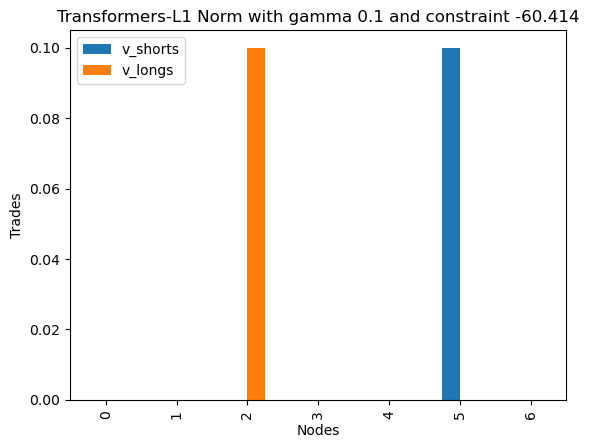

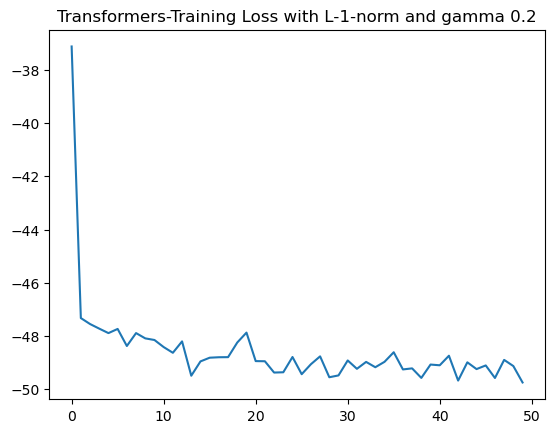

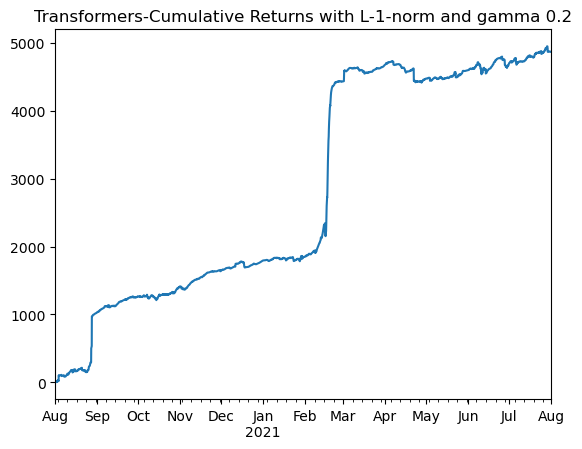

Portfolio returns 3368.5820000000003
constraint -120.828
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, o

100%|██████████| 50/50 [08:19<00:00,  9.98s/it]


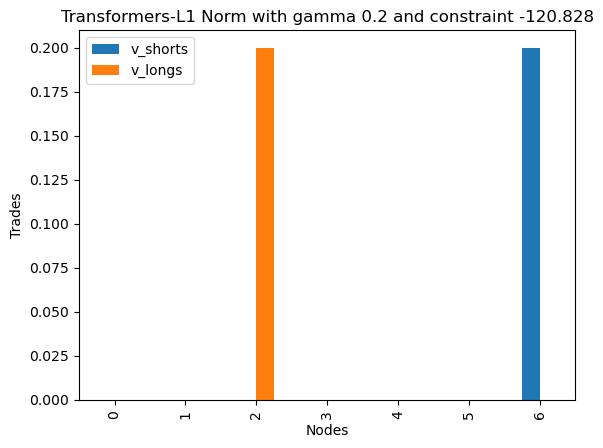

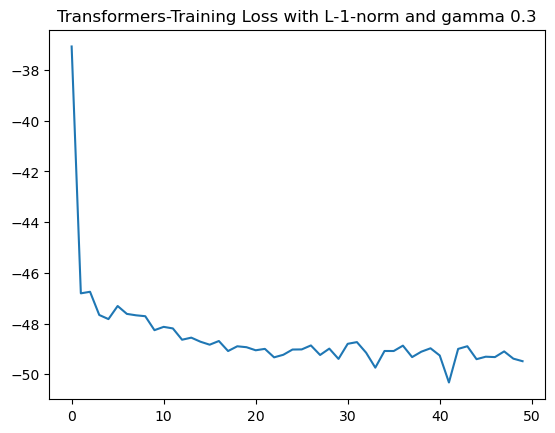

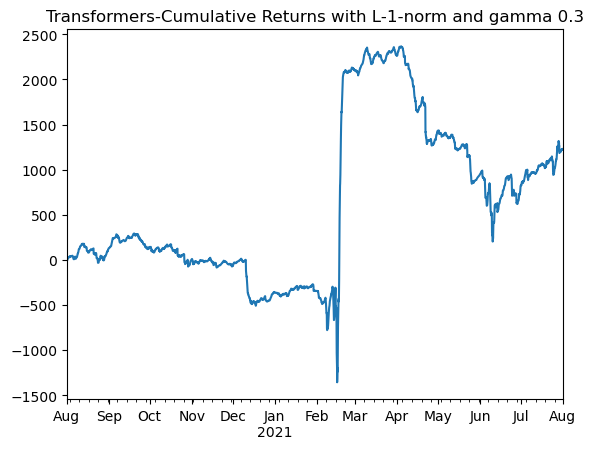

Portfolio returns 3112.233
constraint -183.26999999999998
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, 

100%|██████████| 50/50 [08:48<00:00, 10.57s/it]


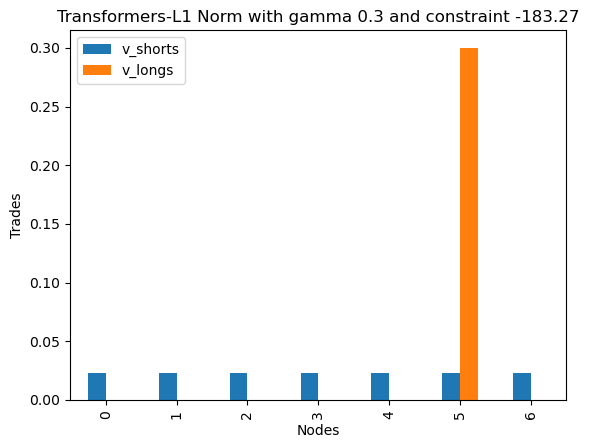

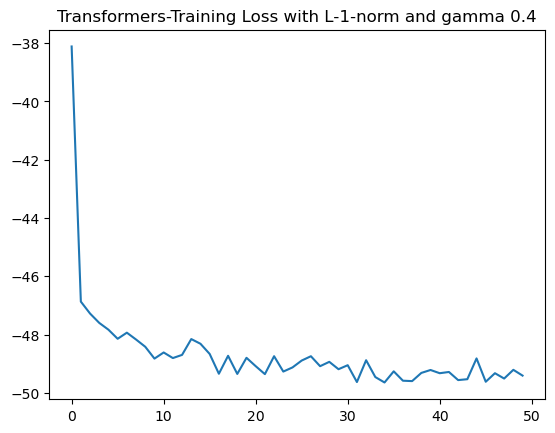

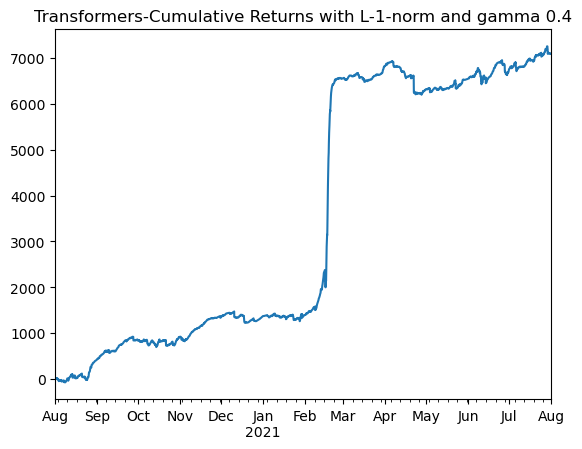

Portfolio returns 5558.82
constraint -241.656
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, out_features

100%|██████████| 50/50 [09:06<00:00, 10.94s/it]


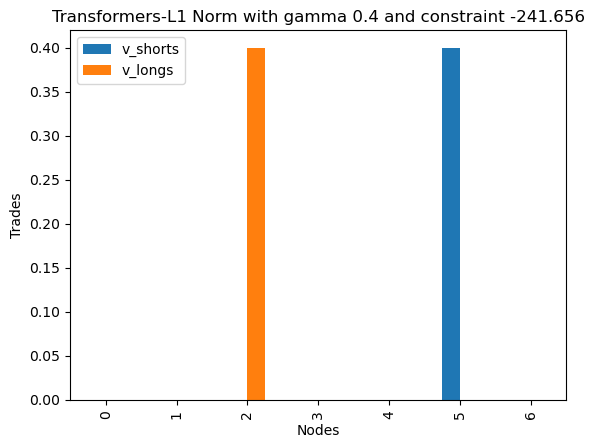

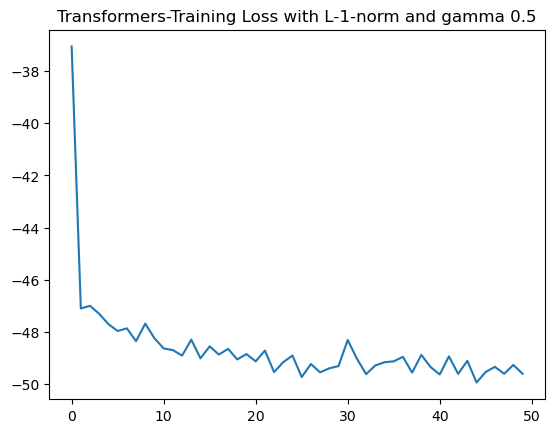

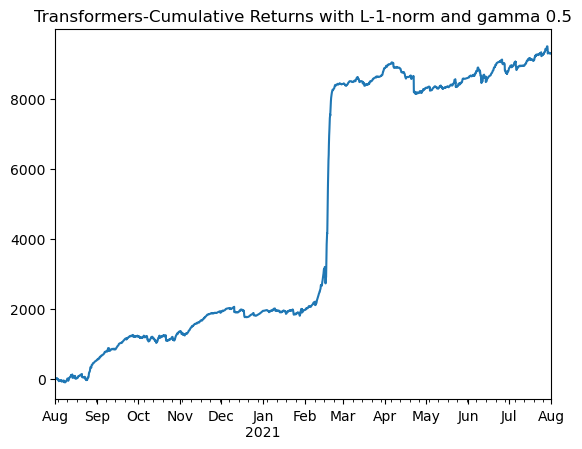

Portfolio returns 7224.54
constraint -302.07
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, out_features=

100%|██████████| 50/50 [09:11<00:00, 11.02s/it]


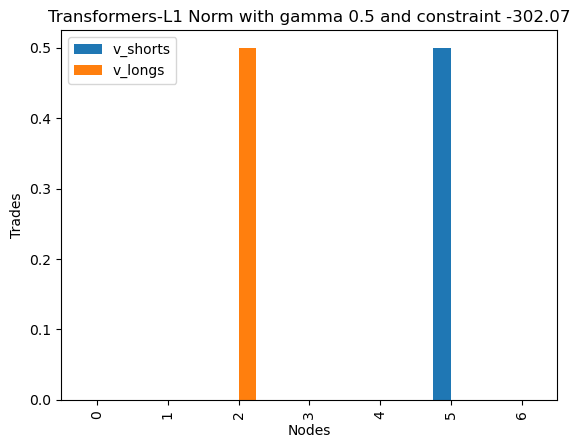

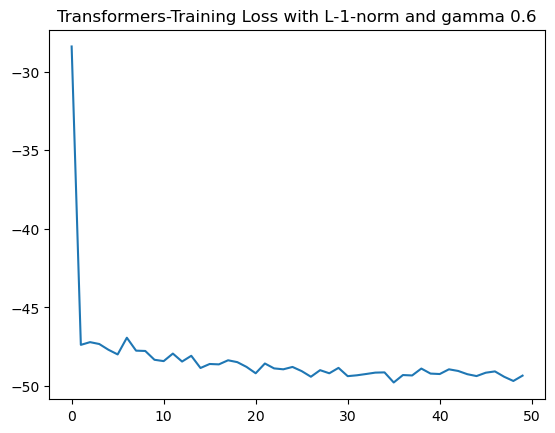

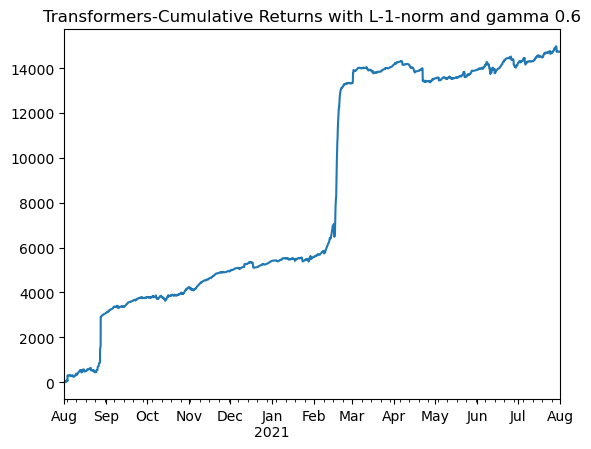

Portfolio returns 10269.761999999999
constraint -362.484
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, o

100%|██████████| 50/50 [09:48<00:00, 11.77s/it]


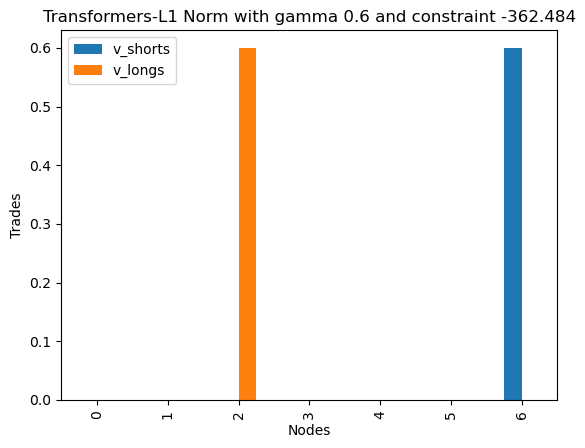

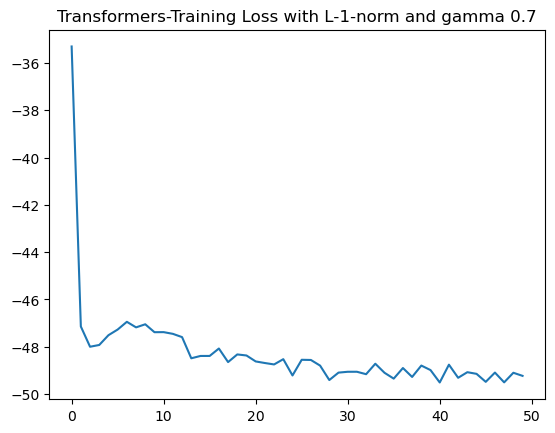

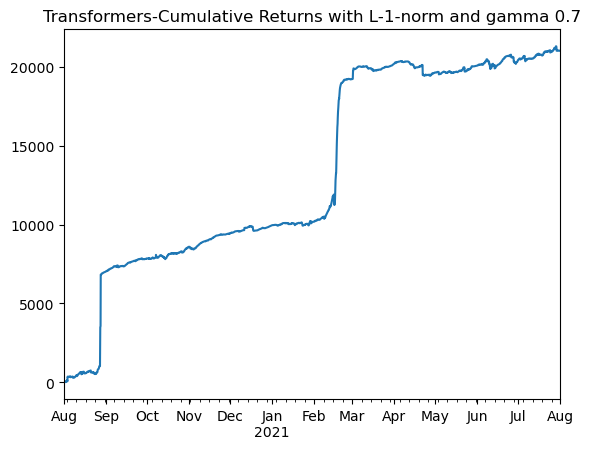

Portfolio returns 14950.326999999997
constraint -422.89799999999997
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_fea

100%|██████████| 50/50 [10:21<00:00, 12.43s/it]


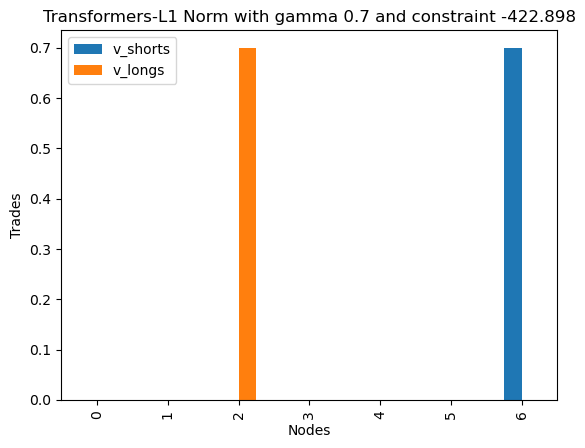

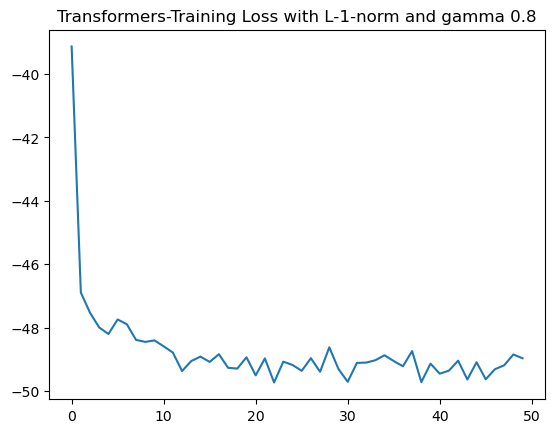

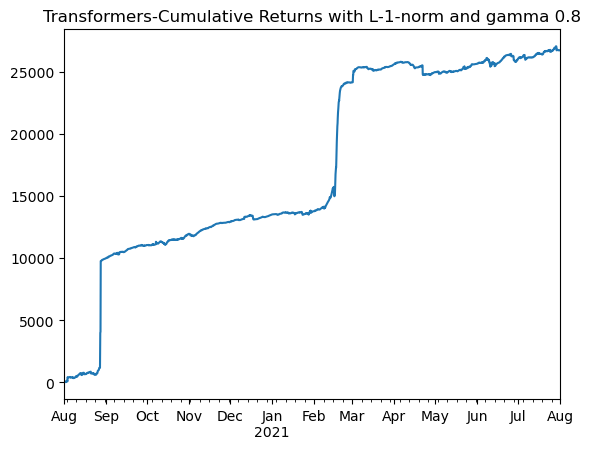

Portfolio returns 19301.76
constraint -483.312
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, out_feature

100%|██████████| 50/50 [09:21<00:00, 11.23s/it]


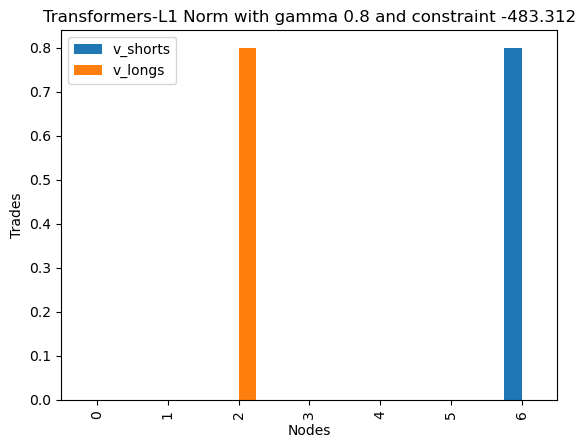

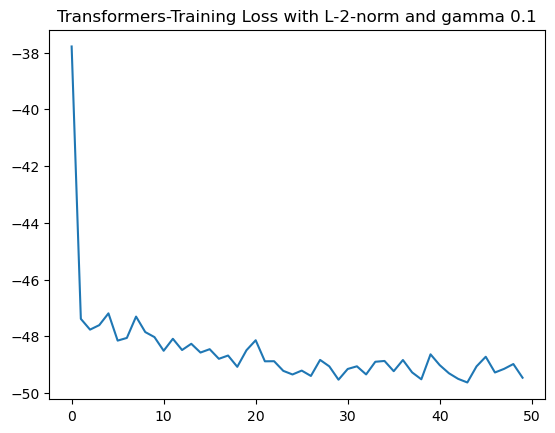

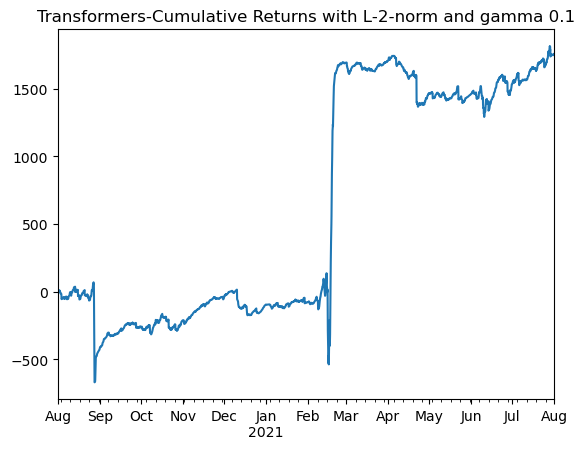

Portfolio returns 1881.087325
constraint -131.051622
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, out_f

100%|██████████| 50/50 [09:02<00:00, 10.85s/it]


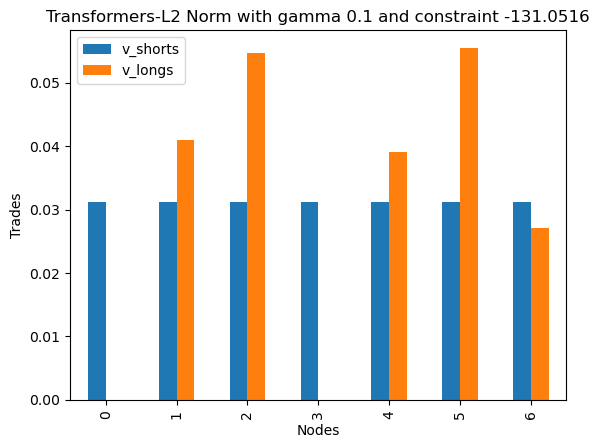

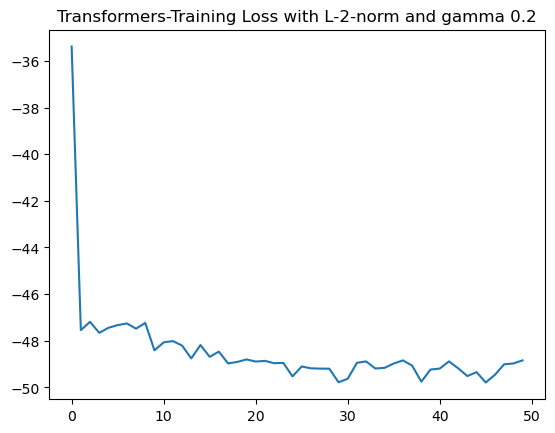

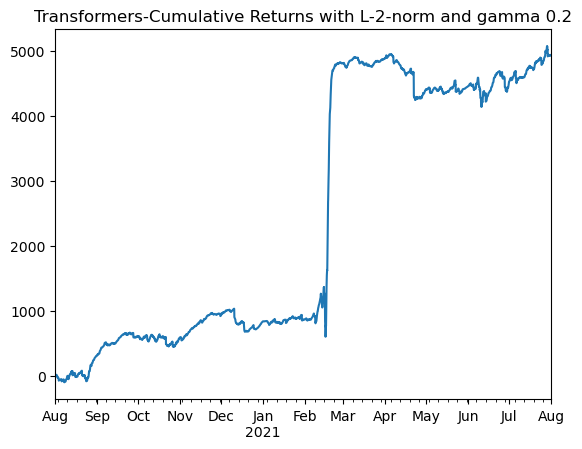

Portfolio returns 4593.368278999999
constraint -242.83475700000002
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_feat

100%|██████████| 50/50 [08:34<00:00, 10.28s/it]


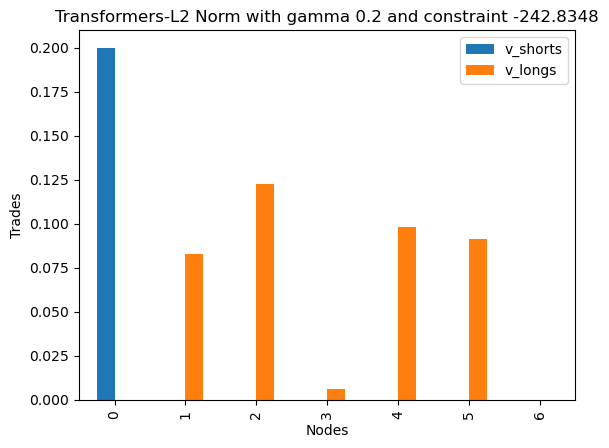

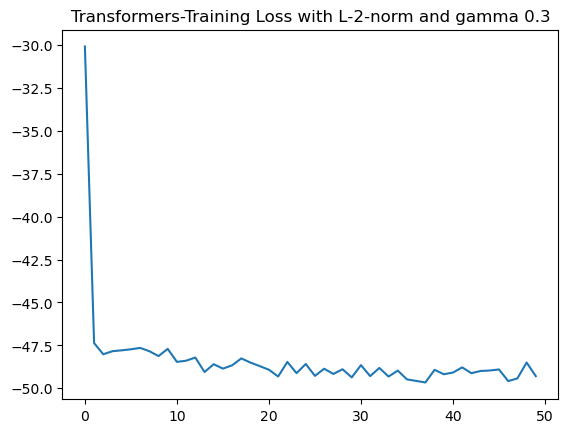

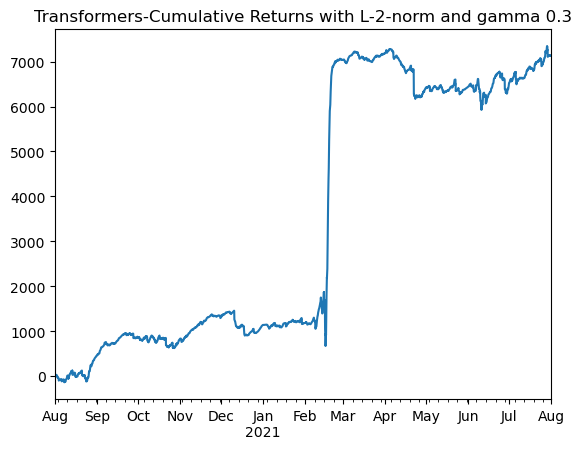

Portfolio returns 6008.561170999999
constraint -360.143975
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12,

100%|██████████| 50/50 [08:38<00:00, 10.37s/it]


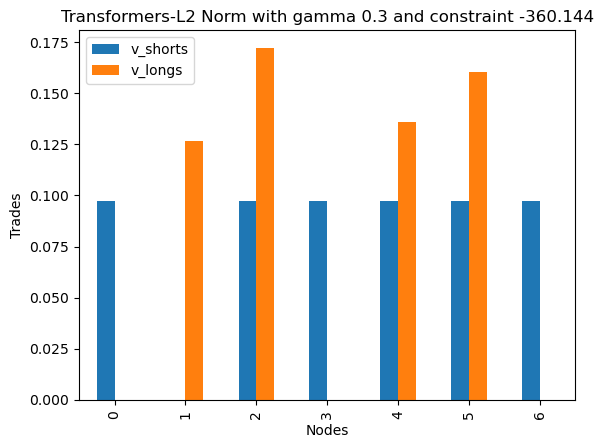

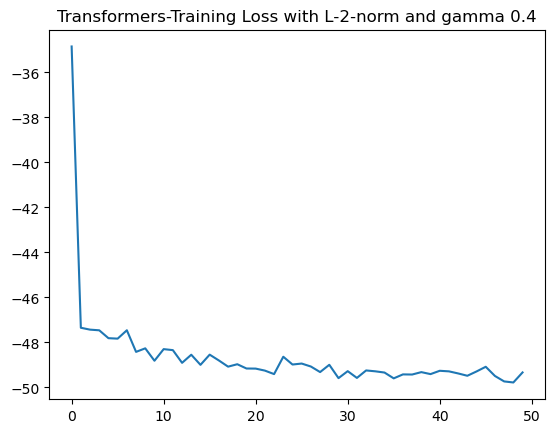

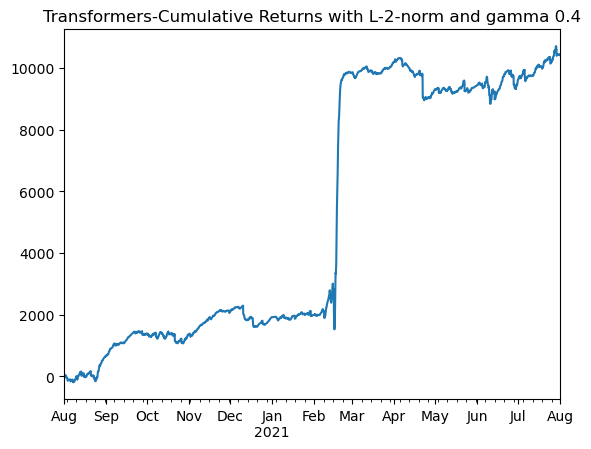

Portfolio returns 9109.184461
constraint -488.970033
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, out_f

100%|██████████| 50/50 [09:07<00:00, 10.95s/it]


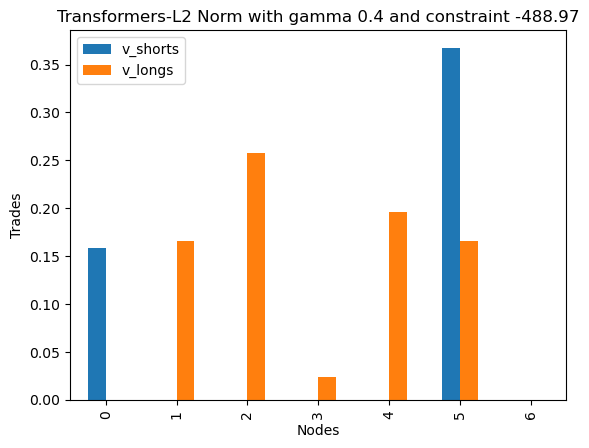

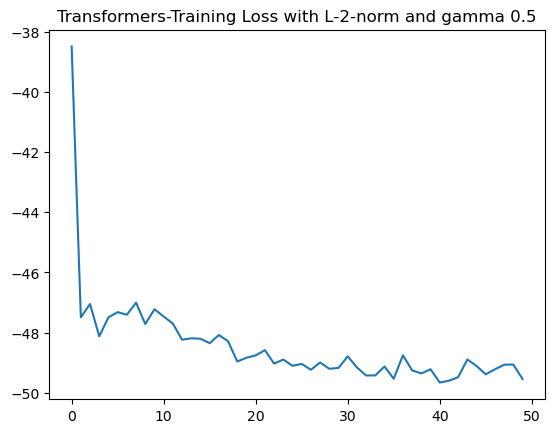

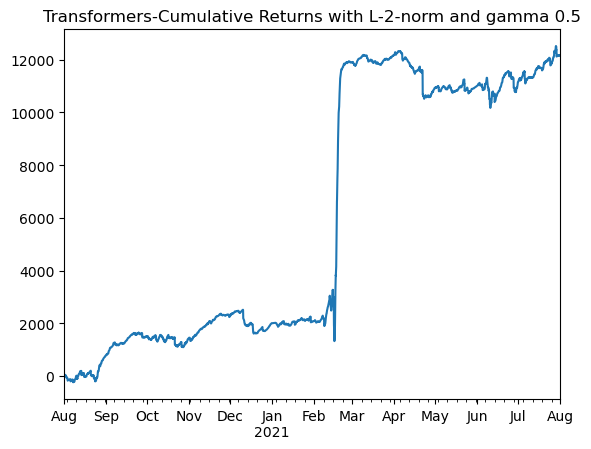

Portfolio returns 10658.900669999999
constraint -601.438222
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12

100%|██████████| 50/50 [08:52<00:00, 10.66s/it]


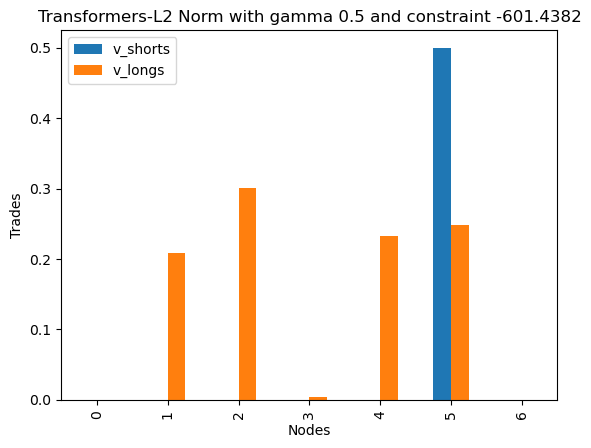

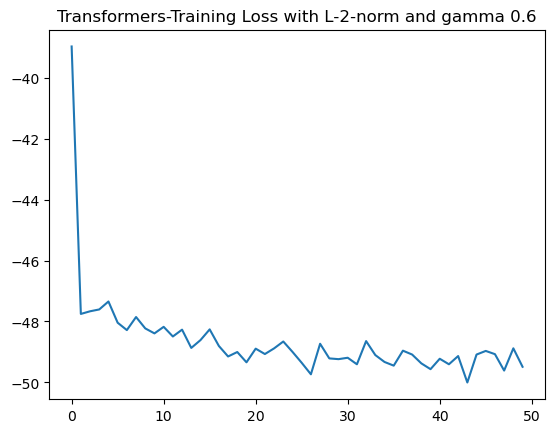

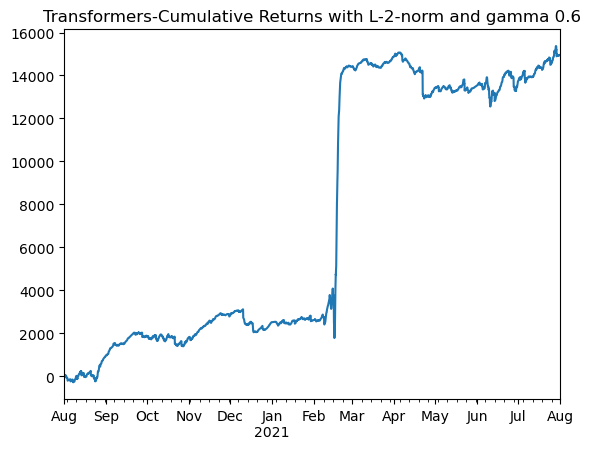

Portfolio returns 13720.372868
constraint -724.135805
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12, out_

100%|██████████| 50/50 [08:35<00:00, 10.31s/it]


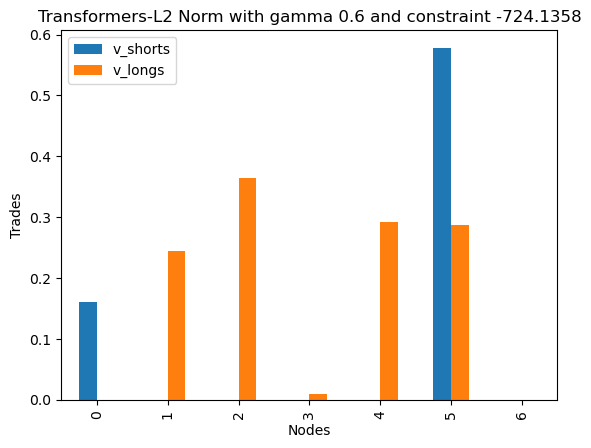

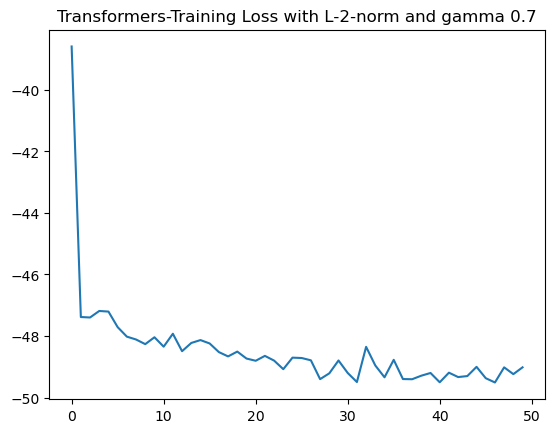

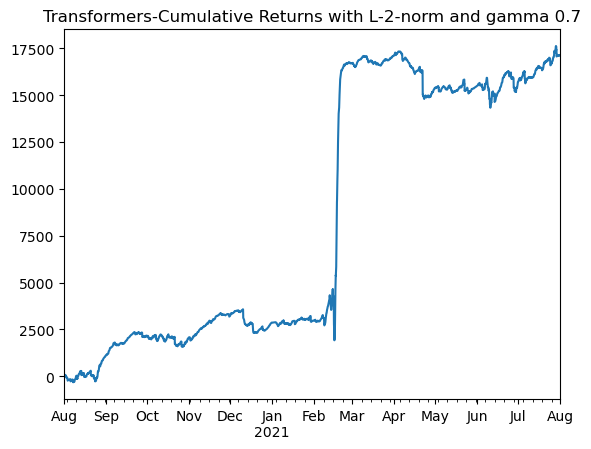

Portfolio returns 15491.239728000004
constraint -845.02631
TradingBot(
  (series_encoder): Embedding(100, 13)
  (encoder): Encoder(
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=12, out_features=12, bias=True)
          )
          (linear1): Linear(in_features=12, out_features=12, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=12, out_features=12, bias=True)
          (norm1): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((12,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (decoder): QuantileDecoder(
    (quantile): AttentionalQuantile(
      (dimension_shifting_layer): Linear(in_features=12,

100%|██████████| 50/50 [09:13<00:00, 11.06s/it]


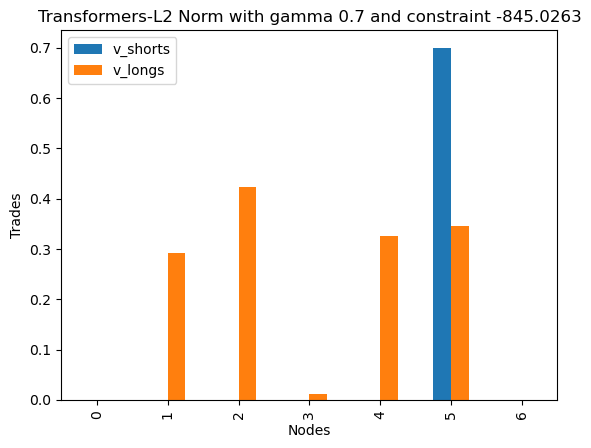

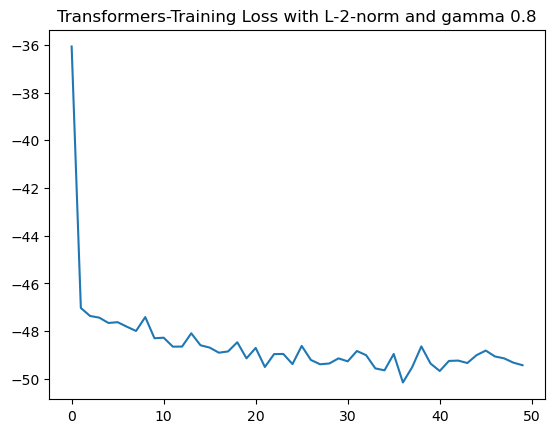

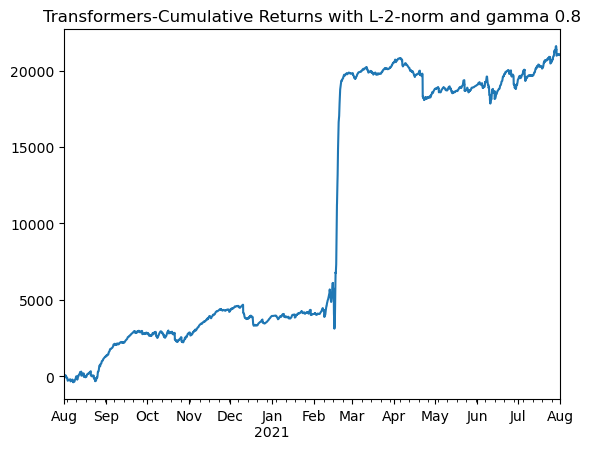

Portfolio returns 17992.685649
constraint -978.657827


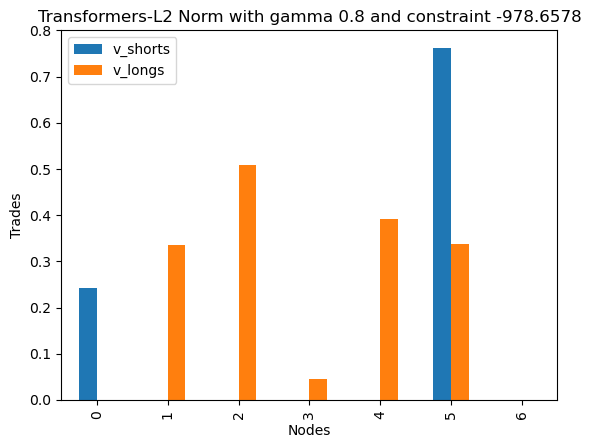

In [9]:

L_vals = np.arange(0.1,0.9,0.1)
L_norms = [1,2]
pd_dict={}
worst_loss_list = np.empty((len(L_norms), len(L_vals)))
worst_return_list = []
best_return_list = []
for l_norm in L_norms:
    for k, L_val in enumerate(L_vals):
        nodes = 7
        volume_short = np.zeros((len(L_vals), nodes))
        volume_long = np.zeros((len(L_vals), nodes))
        net, model_name = Transformers_model(gamma= L_val, l_norm=l_norm)
        optimizer = torch.optim.RMSprop(net.parameters(), lr=1e-3, weight_decay=0)

        print(net)

        avg_loss = []

        NUM_EPOCHS = 50  # The model is very slow to train
        NUM_BATCHES = 35

        for epoch in tqdm(range(NUM_EPOCHS)):
            running_sum = 0
            for batch in range(NUM_BATCHES):
                running_sum += net.train_step(optimizer, 32, da_train.values.T, 24, 24)
            avg_loss.append(running_sum / NUM_BATCHES)

        plt.figure()
        plt.plot(avg_loss)
        plt.title('{}-Training Loss with L-{}-norm and gamma {}'.format(model_name,l_norm, round(L_val,4)))
        plt.show()

        v_long, bid, v_short, offer = net.predict(X_validate, da, da_validate, rt_validate)
        results = hourly_results(v_long, bid.values, v_short, offer.values, da_validate, rt_validate)
        pnl = results.sum(axis=1).cumsum()
        pnl.plot()
        plt.title('{}-Cumulative Returns with L-{}-norm and gamma {}'.format(model_name,l_norm, round(L_val,4)))
        plt.show()
        portfolio_rets = bid.dot(v_long)+ offer.dot(v_short)
        constraint = worst_loss(results)
        best_hour = best_loss(results)
        print('Portfolio returns',np.sum(portfolio_rets))
        print('constraint',constraint)
        worst_return_list.append(constraint)
        best_return_list.append(best_hour)
        for i in range(nodes):
            volume_long[k, :] = v_long
            volume_short[k, :] = v_short
            pd_dict[l_norm, k] = pd.DataFrame({"gamma": f"{round(L_vals[k],4)}",
                            "v_shorts":v_long,
                            "v_longs":v_short})
            pd_dict[l_norm,k]['L_norm'] = f"L{l_norm}"
            
        pd_dict[l_norm,k]['model'] = model_name
        pd_dict[l_norm,k]['PTF_Return'] = np.sum(portfolio_rets)
        pd_dict[l_norm,k]['Worst_Return'] = constraint
        pd_dict[l_norm,k].loc[:, :'L_norm'].plot(kind="bar")
        plt.title("{}-L{} Norm with gamma {} and constraint {}".format(model_name,l_norm,pd_dict[l_norm,k]['gamma'][0], round(pd_dict[l_norm,k]['Worst_Return'][0],4)) )
        plt.xlabel("Nodes")
        plt.ylabel("Trades")


In [13]:
pd_dict

{(1,
  0):   gamma  v_shorts  v_longs L_norm         model  PTF_Return  Worst_Return
 0   0.1       0.0      0.0     L1  Transformers    1502.101       -60.414
 1   0.1       0.0      0.0     L1  Transformers    1502.101       -60.414
 2   0.1       0.0      0.1     L1  Transformers    1502.101       -60.414
 3   0.1       0.0      0.0     L1  Transformers    1502.101       -60.414
 4   0.1       0.0      0.0     L1  Transformers    1502.101       -60.414
 5   0.1       0.1      0.0     L1  Transformers    1502.101       -60.414
 6   0.1       0.0      0.0     L1  Transformers    1502.101       -60.414,
 (1,
  1):   gamma  v_shorts  v_longs L_norm         model  PTF_Return  Worst_Return
 0   0.2       0.0      0.0     L1  Transformers    3368.582      -120.828
 1   0.2       0.0      0.0     L1  Transformers    3368.582      -120.828
 2   0.2       0.0      0.2     L1  Transformers    3368.582      -120.828
 3   0.2       0.0      0.0     L1  Transformers    3368.582      -120.828
 4  

We pick the best startegy that satisfies our constraint and maximizes the returns

The Model to consider is : Transformers model with gamma = 0.8 with L2-norm

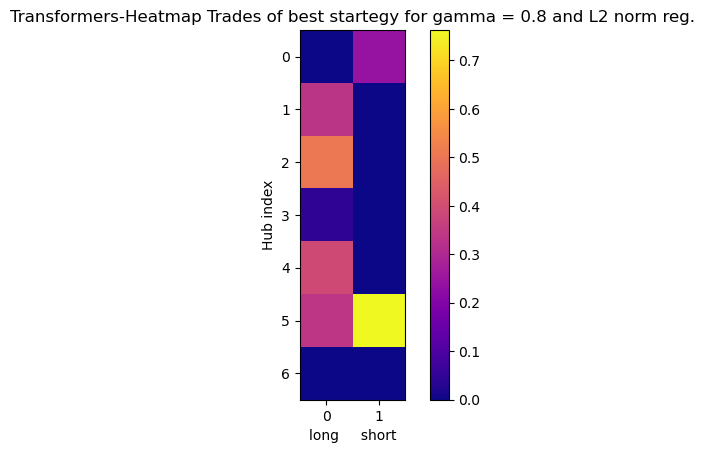

In [14]:

df_trades = pd_dict[(2,7)][['v_longs', 'v_shorts']]
df_trades
heatmap, ax = plt.subplots()
plt.imshow(df_trades, cmap='plasma', interpolation='nearest')
plt.colorbar()
plt.title('Transformers-Heatmap Trades of best startegy for gamma = 0.8 and L2 norm reg.')
ax.set(xlabel='long     short', ylabel='Hub index')
plt.show()


We can visualize our startegy below

Text(0, 0.5, 'Observation Frequency')

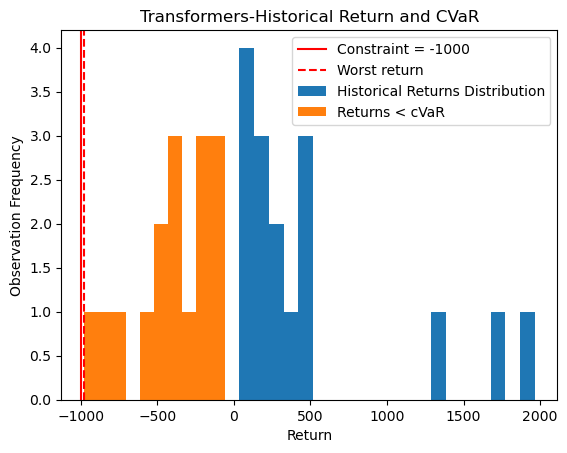

In [15]:


plt.hist(best_return_list, bins=20)
plt.hist(worst_return_list, bins=10)
plt.axvline(-1000, color='red', linestyle='solid')
plt.axvline(constraint, color='red', linestyle='dashed')
plt.legend(['Constraint = -1000',
            'Worst return',
            'Historical Returns Distribution', 
            'Returns < cVaR'])
plt.title('Transformers-Historical Return and CVaR')
plt.xlabel('Return')
plt.ylabel('Observation Frequency')